In [1]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from matplotlib.pyplot import imshow
from sklearn.metrics import classification_report

In [2]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import preprocessing
from tensorflow.keras import metrics
from tensorflow.keras.applications import MobileNetV2

In [3]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [4]:
import numpy as np
import pandas as pd

In [5]:
from imutils import paths

In [6]:
help(keras)

Help on package tensorflow.keras in tensorflow:

NAME
    tensorflow.keras - Implementation of the Keras API meant to be a high-level API for TensorFlow.

DESCRIPTION
    Detailed documentation and user guides are available at
    [tensorflow.org](https://www.tensorflow.org/guide/keras).

PACKAGE CONTENTS
    activations (package)
    applications (package)
    backend (package)
    callbacks (package)
    constraints (package)
    datasets (package)
    estimator (package)
    experimental (package)
    initializers (package)
    layers (package)
    losses (package)
    metrics (package)
    mixed_precision (package)
    models (package)
    optimizers (package)
    premade (package)
    preprocessing (package)
    regularizers (package)
    utils (package)
    wrappers (package)

VERSION
    2.4.0

FILE
    c:\users\user\anaconda3\lib\site-packages\tensorflow\keras\__init__.py




In [7]:
data = list(paths.list_images(r'C:\Users\user\OneDrive\Documents\code\face-mask-detector\face-mask-detector\dataset'))

In [8]:
data

['C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\dataset\\without_mask\\0.jpg',
 'C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\dataset\\without_mask\\1.jpg',
 'C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\dataset\\without_mask\\10.jpg',
 'C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\dataset\\without_mask\\100.jpg',
 'C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\dataset\\without_mask\\101.jpg',
 'C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\dataset\\without_mask\\102.jpg',
 'C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\dataset\\without_mask\\104.jpg',
 'C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\dataset\\without_mask\\105.jpg',
 'C:\\Users\\user\\OneDrive\\Documents\\code\\face-ma

In [9]:
batch_size = 24
epochs = 25
lr = 0.01


In [14]:
labels[0]

'without_mask'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


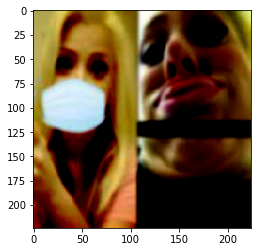

In [15]:
imshow(image[-56])

In [12]:
image = []
re = []
for dat in data:
    te = dat.split('\\')[9]
    car = load_img(dat, target_size = (224,224))
    car = img_to_array(car)
    car = preprocess_input(car)
    
    image.append(car)
    re.append(te)
   
    
    

In [13]:
image = np.array(image)
labels = np.array(re)

In [16]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

In [17]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [18]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [19]:
train_x, test_x, train_y, test_y = train_test_split(image, labels, random_state = 42, stratify=labels, test_size =0.3 )

In [23]:
model = Sequential()    

In [24]:
model.add(e (include_top=False,weights="imagenet",pooling='avg'))

In [25]:
model.add(Dense(128, activation = relu))
model.add(Dropout(0.5))
model.add(Dense(2, activation = softmax))

In [26]:
model.layers[0].trainable = False

In [27]:
opt = Adam(lr = lr)

In [28]:
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [29]:
model.fit(train_x, train_y,steps_per_epoch = len(train_x)//24, validation_data = (test_x, test_y), epochs = epochs, batch_size = 24)

Epoch 1/25
40/40 [==============================] - 99s 2s/step - loss: 0.6987 - accuracy: 0.9260 - val_loss: 0.0518 - val_accuracy: 0.9903
Epoch 2/25
40/40 [==============================] - 85s 2s/step - loss: 0.1707 - accuracy: 0.9830 - val_loss: 0.0313 - val_accuracy: 0.9952
Epoch 3/25
40/40 [==============================] - 86s 2s/step - loss: 0.1244 - accuracy: 0.9872 - val_loss: 0.0338 - val_accuracy: 0.9976
Epoch 4/25
40/40 [==============================] - 83s 2s/step - loss: 0.1380 - accuracy: 0.9872 - val_loss: 0.0626 - val_accuracy: 0.9927
Epoch 5/25
40/40 [==============================] - 82s 2s/step - loss: 0.1034 - accuracy: 0.9872 - val_loss: 0.2545 - val_accuracy: 0.9782
Epoch 6/25
40/40 [==============================] - 88s 2s/step - loss: 0.0400 - accuracy: 0.9936 - val_loss: 0.0218 - val_accuracy: 0.9976
Epoch 7/25
40/40 [==============================] - 81s 2s/step - loss: 0.0436 - accuracy: 0.9947 - val_loss: 0.2156 - val_accuracy: 0.9831
Epoch 8/25
40/40 [==

In [30]:
fad = model.predict(test_x)

In [31]:
fad = np.argmax(fad, axis=1)

In [32]:
print(classification_report(test_y.argmax(axis=1), fad,
	target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       1.00      0.99      0.99       207
without_mask       0.99      1.00      0.99       206

    accuracy                           0.99       413
   macro avg       0.99      0.99      0.99       413
weighted avg       0.99      0.99      0.99       413



In [33]:
examples = list(paths.list_images(r'C:\Users\user\OneDrive\Documents\code\face-mask-detector\face-mask-detector\examples'))

In [34]:
examples



['C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\examples\\example_01.png',
 'C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\examples\\example_02.png',
 'C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\examples\\example_03.png',
 'C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\examples\\IMG-20200806-WA0032.jpg',
 'C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\examples\\WhatsApp Image 2020-08-11 at 3.52.14 PM.jpeg',
 'C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\examples\\WhatsApp Image 2020-08-11 at 3.52.18 PM.jpeg',
 'C:\\Users\\user\\OneDrive\\Documents\\code\\face-mask-detector\\face-mask-detector\\examples\\WhatsApp Image 2020-08-11 at 3.52.25 PM.jpeg']

In [35]:
ra = []
for ex in examples:
    te = ex.split('\\')[8]
    car = load_img(ex, target_size =(224,224))
    car = img_to_array(car)
    car = preprocess_input(car)
    
    ra.append(car)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


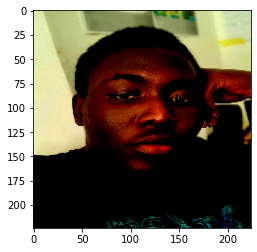

In [44]:
imshow(ra[3])

In [38]:
ra = np.array(ra)

In [39]:
model.predict(ra)

array([[6.9584496e-30, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00]], dtype=float32)